<a href="https://colab.research.google.com/github/thepankj/SMS-Spam-Classification/blob/main/SMS_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#this cell is needed to know the encoding of the file
import chardet
with open('/content/drive/MyDrive/Projects/SMS Spam /spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'confidence': 0.7270322499829184, 'encoding': 'Windows-1252', 'language': ''}

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects/SMS Spam /spam.csv', encoding='Windows-1252')

In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2260,spam,SplashMobile: Choose from 1000s of gr8 tones e...,NaN,NaN,NaN
2625,spam,"FREE RING TONE just text \POLYS\"" to 87131. Th...",NaN,NaN,NaN
164,spam,BangBabes Ur order is on the way. U SHOULD rec...,NaN,NaN,NaN
4133,ham,Is it your yahoo boys that bring in the perf? ...,NaN,NaN,NaN
4173,ham,And pls pls drink plenty plenty water,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

#Steps
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Website
8. Deploy

#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df[df['Unnamed: 2'].notnull()].head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


In [ ]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace=True)

In [ ]:
df.rename(columns={'v1':'Labels', 'v2':'Text'}, inplace=True)

In [ ]:
df.sample(5)

,Labels,Text
1881,ham,Ok.. ÌÏ finishing soon?
3099,ham,Tessy..pls do me a favor. Pls convey my birthd...
3682,ham,When did i use soc... I use it only at home......
4886,spam,Todays Vodafone numbers ending with 4882 are s...
1196,ham,What he said is not the matter. My mind saying...


In [ ]:
#encoding the labels
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Labels'])
encoder.classes_

array(['ham', 'spam'], dtype=object)

In [ ]:
df['Labels'] = encoder.transform(df['Labels'])
df.head()

,Labels,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Labels    0
Text      0
dtype: int64

In [ ]:
#check for duplicate values
df.duplicated().sum()

403

In [ ]:
#drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.shape

(5169, 2)

##EDA

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df['Labels'].value_counts()

0    4516
1     653
Name: Labels, dtype: int64

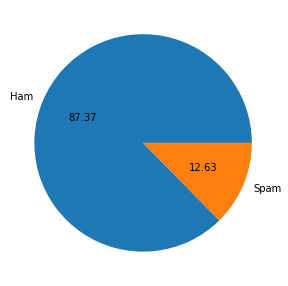

In [ ]:
plt.figure(figsize=[5,5])
plt.pie(df['Labels'].value_counts(), labels=['Ham','Spam'], autopct='%0.2f');

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#character count for the messages
df['char_count'] = df['Text'].apply(len)

In [ ]:
#word count of the messages
df['word_count'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
#sentence count of the messages
df['sent_count'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df[['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
#ham
df[df['Labels']==0][['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [ ]:
#spam
df[df['Labels']==1][['char_count', 'word_count', 'sent_count']].describe()

,char_count,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


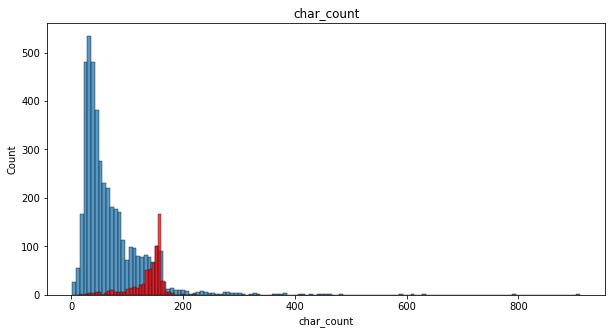

In [ ]:
#histogram of char_count
plt.figure(figsize = [10, 5])
plt.title('char_count')
sns.histplot(df[df['Labels']==0]['char_count'], legend='Ham')
sns.histplot(df[df['Labels']==1]['char_count'], color = 'red')
plt.show()

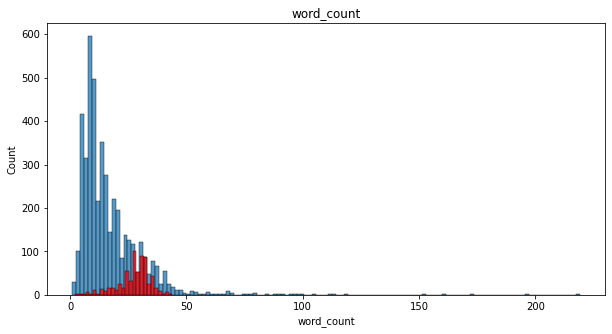

In [ ]:
#histogram of word_count
plt.figure(figsize = [10, 5])
plt.title('word_count')
sns.histplot(df[df['Labels']==0]['word_count'], legend='Ham')
sns.histplot(df[df['Labels']==1]['word_count'], color = 'red')
plt.show()

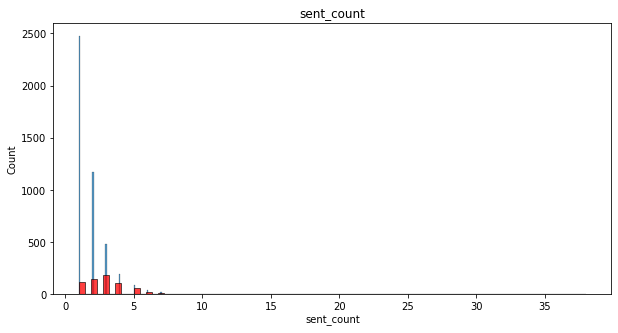

In [ ]:
#histogram of sent_count
plt.figure(figsize = [10, 5])
plt.title('sent_count')
sns.histplot(df[df['Labels']==0]['sent_count'], legend='Ham')
sns.histplot(df[df['Labels']==1]['sent_count'], color = 'red')
plt.show()

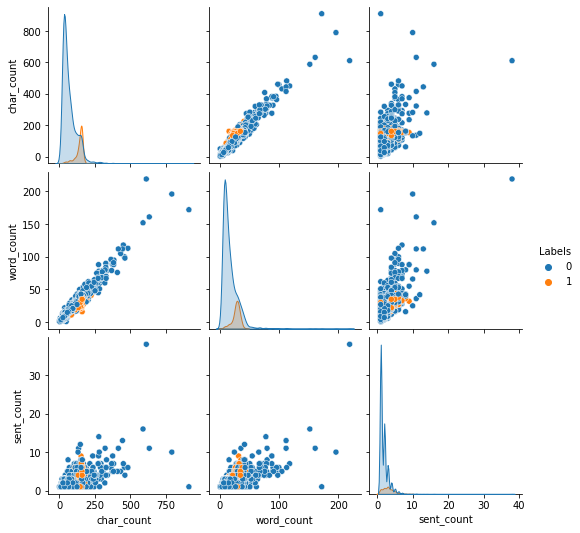

In [ ]:
sns.pairplot(df, hue='Labels')

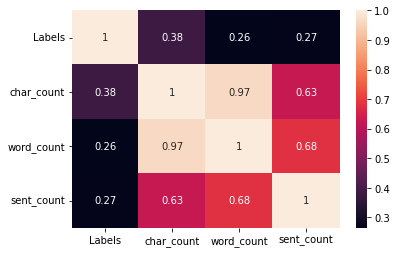

In [ ]:
sns.heatmap(df.corr(), annot=True);

##Data Preprocessing

In [ ]:
ps = PorterStemmer()
def transform(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text: #remove special characters
    if i.isalnum():
      y.append(i)

  text = y.copy()
  y.clear()
  for i in text:
    if i not in stopwords.words('english'):
      y.append(i)

  text = y.copy()
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
df['transformed_text'] = df['Text'].apply(transform)

In [ ]:
df.head()

,Labels,Text,char_count,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=700, height=700, min_font_size=10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['Labels']==1]['Text'].str.cat(sep = ' '))

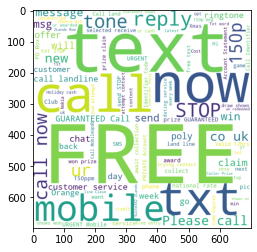

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['Labels']==0]['Text'].str.cat(sep = ' '))

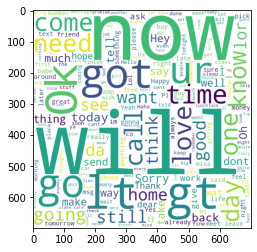

In [ ]:
plt.imshow(ham_wc)

In [ ]:
spam_words = []
for s in df[df['Labels']==1]['transformed_text'].tolist():
  for word in s.split():
    spam_words.append(word)

In [ ]:
len(spam_words)

9883

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


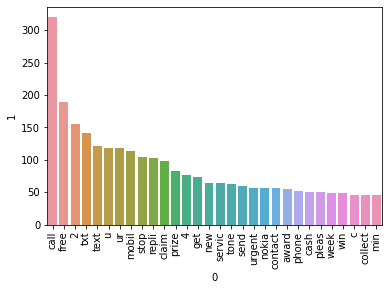

In [ ]:
from collections import Counter
top_spam_words = Counter(spam_words).most_common(30)
top_spam_words_df = pd.DataFrame(top_spam_words)
sns.barplot(top_spam_words_df[0], top_spam_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_words = []
for s in df[df['Labels']==0]['transformed_text'].tolist():
  for word in s.split():
    ham_words.append(word)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


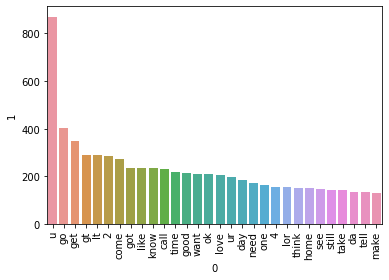

In [ ]:
from collections import Counter
top_ham_words = Counter(ham_words).most_common(30)
top_ham_words_df = pd.DataFrame(top_ham_words)
sns.barplot(top_ham_words_df[0], top_ham_words_df[1])
plt.xticks(rotation='vertical')
plt.show()

##Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
cv = CountVectorizer()
tfidf = TfidfVectorizer()

Using BoW

In [ ]:
#using bow (CountVectorizer)
X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(5169, 6629)

In [ ]:
y = df['Labels'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
#gnb
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8597678916827853
[[763 126]
 [ 19 126]]
0.5


In [ ]:
#mnb
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9729206963249516
[[872  17]
 [ 11 134]]
0.8874172185430463


In [ ]:
#bnb
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


Using TF-IDF

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
#gnb
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8539651837524178
[[771 128]
 [ 23 112]]
0.4666666666666667


In [ ]:
#mnb
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9516441005802708
[[899   0]
 [ 50  85]]
1.0


In [ ]:
#bnb
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9545454545454546
[[894   5]
 [ 42  93]]
0.9489795918367347


We see that TF-IDF + MNB gives the best Precision, so it is selected

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lr = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [ ]:
clfs = {'LR':lr,
        'SVC':svc,
        'MNB':mnb,
        'DTC':dtc,
        'KNC':knc,
        'RFC':rfc,
        'ABC':abc,
        'BC':bc,
        'ETC':etc,
        'GBC':gbc,
        'XGB':xgb}

In [ ]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [ ]:
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9680851063829787, 0.9473684210526315)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  curr_accuracy, curr_precision = train_classifier(clf, X_train, X_test, y_train, y_test)
  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

In [ ]:
performance_df.sort_values(['Precision', 'Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision
5,RFC,0.964217,1.000000
2,MNB,0.951644,1.000000
4,KNC,0.900387,1.000000
8,ETC,0.971954,0.990741
1,SVC,0.968085,0.947368
6,ABC,0.947776,0.900990
0,LR,0.939072,0.882979
10,XGB,0.932302,0.865169
9,GBC,0.932302,0.857143
7,BC,0.948743,0.847458


Using tfidf with max_features as 3000

In [ ]:
tf_less_features = TfidfVectorizer(max_features=3000)

In [ ]:
X_n = tf_less_features.fit_transform(df['transformed_text']).toarray()
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y, test_size=0.2, random_state=1)

In [ ]:
X_n.shape

(5169, 3000)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  curr_accuracy, curr_precision = train_classifier(clf, Xn_train, Xn_test, yn_train, yn_test)
  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

In [ ]:
performance_df_n = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_n':accuracy_scores, 'Precision_n':precision_scores})

In [ ]:
performance_df_n.sort_values(['Precision_n', 'Accuracy_n'], ascending=False)

,Algorithm,Accuracy_n,Precision_n
2,MNB,0.961315,1.000000
4,KNC,0.909091,1.000000
8,ETC,0.975822,0.991071
5,RFC,0.966151,0.971698
1,SVC,0.967118,0.946903
9,GBC,0.938104,0.927711
10,XGB,0.930368,0.920000
6,ABC,0.951644,0.904762
0,LR,0.942940,0.887755
7,BC,0.949710,0.860870


In [ ]:
final_df = performance_df.merge(performance_df_n, on='Algorithm')
final_df

,Algorithm,Accuracy,Precision,Accuracy_n,Precision_n
0,LR,0.939072,0.882979,0.942940,0.887755
1,SVC,0.968085,0.947368,0.967118,0.946903
2,MNB,0.951644,1.000000,0.961315,1.000000
3,DTC,0.912959,0.758621,0.911025,0.741573
4,KNC,0.900387,1.000000,0.909091,1.000000
5,RFC,0.964217,1.000000,0.966151,0.971698
6,ABC,0.947776,0.900990,0.951644,0.904762
7,BC,0.948743,0.847458,0.949710,0.860870
8,ETC,0.971954,0.990741,0.975822,0.991071
9,GBC,0.932302,0.857143,0.938104,0.927711


Scaling the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_n

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mms = MinMaxScaler()
X_n_scaled = mms.fit_transform(X_n)

In [ ]:
XnScaled_train, XnScaled_test, yn_train, yn_test = train_test_split(X_n_scaled, y, test_size=0.2, random_state=1)

In [ ]:
XnScaled_train.shape

(4135, 3000)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  curr_accuracy, curr_precision = train_classifier(clf, XnScaled_train, XnScaled_test, yn_train, yn_test)
  accuracy_scores.append(curr_accuracy)
  precision_scores.append(curr_precision)

In [ ]:
performance_df_n_scaled = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_n_Scaled':accuracy_scores, 'Precision_n_Scaled':precision_scores})

In [ ]:
performance_df_n_scaled.sort_values(['Precision_n', 'Accuracy_n'], ascending=False)

,Algorithm,Accuracy_n,Precision_n
2,MNB,0.961315,1.000000
4,KNC,0.909091,1.000000
8,ETC,0.975822,0.991071
5,RFC,0.966151,0.971698
1,SVC,0.967118,0.946903
9,GBC,0.938104,0.927711
10,XGB,0.930368,0.920000
6,ABC,0.951644,0.904762
0,LR,0.942940,0.887755
7,BC,0.949710,0.860870


In [ ]:
final_df = final_df.merge(performance_df_n_scaled, on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_n,Precision_n,Accuracy_n_Scaled,Precision_n_Scaled
0,LR,0.939072,0.882979,0.942940,0.887755,0.952611,0.921569
1,SVC,0.968085,0.947368,0.967118,0.946903,0.958414,0.933962
2,MNB,0.951644,1.000000,0.961315,1.000000,0.981625,0.975410
3,DTC,0.912959,0.758621,0.911025,0.741573,0.911025,0.741573
4,KNC,0.900387,1.000000,0.909091,1.000000,0.909091,1.000000
5,RFC,0.964217,1.000000,0.966151,0.971698,0.966151,0.971698
6,ABC,0.947776,0.900990,0.951644,0.904762,0.951644,0.904762
7,BC,0.948743,0.847458,0.949710,0.860870,0.949710,0.860870
8,ETC,0.971954,0.990741,0.975822,0.991071,0.975822,0.991071
9,GBC,0.932302,0.857143,0.938104,0.927711,0.938104,0.927711


In [ ]:
final_df.sort_values(['Precision', 'Precision_n', 'Precision_n_Scaled'], ascending=False)

,Algorithm,Accuracy,Precision,Accuracy_n,Precision_n,Accuracy_n_Scaled,Precision_n_Scaled
4,KNC,0.900387,1.000000,0.909091,1.000000,0.909091,1.000000
2,MNB,0.951644,1.000000,0.961315,1.000000,0.981625,0.975410
5,RFC,0.964217,1.000000,0.966151,0.971698,0.966151,0.971698
8,ETC,0.971954,0.990741,0.975822,0.991071,0.975822,0.991071
1,SVC,0.968085,0.947368,0.967118,0.946903,0.958414,0.933962
6,ABC,0.947776,0.900990,0.951644,0.904762,0.951644,0.904762
0,LR,0.939072,0.882979,0.942940,0.887755,0.952611,0.921569
10,XGB,0.932302,0.865169,0.930368,0.920000,0.930368,0.920000
9,GBC,0.932302,0.857143,0.938104,0.927711,0.938104,0.927711
7,BC,0.948743,0.847458,0.949710,0.860870,0.949710,0.860870


Using Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('MNB', mnb), ('RFC', rfc), ('ETC', etc)], voting='soft')

In [ ]:
voting.fit(Xn_train, yn_train)

VotingClassifier(estimators=[('MNB', MultinomialNB()),
                             ('RFC',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(Xn_test)
print('Accuracy', accuracy_score(yn_test, y_pred))
print('Precision', precision_score(yn_test, y_pred))

Accuracy 0.9709864603481625
Precision 1.0
